In [1]:
import pandas as pd
import numpy as np
import unidecode

from stop_words import get_stop_words
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
precios = pd.read_pickle('precios.pkl')
productos = pd.read_pickle('productos.pkl')
sucursales = pd.read_pickle('sucursales.pkl')

In [3]:
di = {1:1, 2:1, 3:1, 4:2, 5:2, 6:3, 7:3, 8:4, 9:4, 10:4}

In [4]:
precios['periodo'] = precios['medicion'].replace(di)

In [5]:
#pasar a formato columnar
precios2 = precios.pivot_table(index=['producto','sucursal'], columns = 'medicion', values = 'precio')

In [6]:
#rellenar con los precios aledaños
precios2 = precios2.interpolate(axis =1)

In [7]:
#columnas por periodo y final
precios2['p1'] = precios2[[1,2,3]].mean(axis=1)
precios2['p2'] = precios2[[4,5]].mean(axis=1)
precios2['p3'] = precios2[[6,7]].mean(axis=1)
precios2['p4'] = precios2[[8,9,10]].mean(axis=1)
precios2['mean'] = precios2.mean(axis=1)

In [8]:
#eliminar los que tengan faltantes en las nuevas columnas
precios3 = precios2.dropna(subset = ['p1', 'p2', 'p3', 'p4', 'mean'])

In [9]:
def var(row, c1, c2):
    res = (row[c2] - row[c1]) / row[c2]
    return(res)

In [10]:
#variacion intra periodo
precios3['var1'] = (precios3.p2 - precios3.p1 ) / precios3.p1
precios3['var2'] = (precios3.p3 - precios3.p2 ) / precios3.p1
precios3['var3'] = (precios3.p4 - precios3.p3 ) / precios3.p1
precios3['var_tot'] = (precios3.p4 - precios3.p1 ) / precios3.p1

/Users/bsidoruk/Documents/MAESTRIA/MARTES/TP/tp2/env_tp2/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/bsidoruk/Documents/MAESTRIA/MARTES/TP/tp2/env_tp2/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/bsidoruk/Documents/MAESTRIA/MARTES/TP/tp2/env_tp2/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying 

In [11]:
precios3['var1_cat'] = pd.cut(precios3['var1'], 
                              bins=[-1.1, -0.1, -0.05, -0.005, 0.005, 0.05, 0.1, 1.1],
                             labels = ['df', 'dm', 'dl', 'm', 'al', 'am', 'af'])

precios3['var2_cat'] = pd.cut(precios3['var2'], 
                              bins=[-1.1, -0.1, -0.05, -0.005, 0.005, 0.05, 0.1, 1.1],
                             labels = ['df', 'dm', 'dl', 'm', 'al', 'am', 'af'])

precios3['var3_cat'] = pd.cut(precios3['var3'], 
                              bins=[-1.1, -0.1, -0.05, -0.005, 0.005, 0.05, 0.1, 1.1],
                             labels = ['df', 'dm', 'dl', 'm', 'al', 'am', 'af'])

precios3['var_tot_cat'] = pd.cut(precios3['var_tot'], 
                              bins=[-1.1, -0.1, -0.05, -0.005, 0.005, 0.05, 0.1, 1.1],
                             labels = ['df', 'dm', 'dl', 'm', 'al', 'am', 'af'])

/Users/bsidoruk/Documents/MAESTRIA/MARTES/TP/tp2/env_tp2/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/bsidoruk/Documents/MAESTRIA/MARTES/TP/tp2/env_tp2/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/bsidoruk/Documents/MAESTRIA/MARTES/TP/tp2/env_tp2/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value

In [12]:
#x individual, y promedio
precios4 = precios3.reset_index().merge(precios3.groupby('producto')[['p1','p2', 'p3', 'p4']].mean(), 
                         how = 'left',
                         left_on = 'producto',
                         right_on = 'producto')

precios4.set_index(['producto','sucursal'], inplace=True)

In [311]:
from IPython.display import display
pd.options.display.max_columns = None

In [313]:
precios4.head() #47.333333

medicion                   1     2     3     4     5      6      7     8  \
producto      sucursal                                                     
0000040084107 10-1-214  36.0  36.0  36.0  36.0  36.0  36.00  43.50  43.5   
              10-1-219  36.0  36.0  36.0  36.0  36.0  36.00  43.50  43.5   
              10-1-220  36.0  36.0  36.0  36.0  36.0  36.00  39.75  43.5   
              10-1-26   36.0  36.0  36.0  36.0  36.0  39.75  43.50  43.5   
              10-1-271  36.0  36.0  36.0  36.0  36.0  36.00  43.50  43.5   

medicion                   9    10  p1_x  p2_x    p3_x       p4_x       mean  \
producto      sucursal                                                         
0000040084107 10-1-214  43.5  55.0  36.0  36.0  39.750  47.333333  40.041667   
              10-1-219  46.0  55.0  36.0  36.0  39.750  48.166667  40.279762   
              10-1-220  43.5  55.0  36.0  36.0  37.875  47.333333  39.639881   
              10-1-26   43.5  55.0  36.0  36.0  41.625  47.333333  40.443452   
              10-1-271  46.0  55.0  36.0  36.0  39.750  48.166667  40.279762   

medicion                var1      var2      var3   var_tot var1_cat var2_cat  \
producto      sucursal                                                         
0000040084107 10-1-214   0.0  0.104167  0.210648  0.314815        m       af   
              10-1-219   0.0  0.104167  0.233796  0.337963        m       af   
              10-1-220   0.0  0.052083  0.262731  0.314815        m       am   
              10-1-26    0.0  0.156250  0.158565  0.314815        m       af   
              10-1-271   0.0  0.104167  0.233796  0.337963        m       af   

medicion               var3_cat var_tot_cat       p1_y       p2_y       p3_y  \
producto      sucursal                                                         
0000040084107 10-1-214       af          af  41.291618  41.305291  42.606626   
              10-1-219       af          af  41.291618  41.305291  42.606626   
              10-1-220       af          af  41.291618  41.305291  42.606626   
              10-1-26        af          af  41.291618  41.305291  42.606626   
              10-1-271       af          af  41.291618  41.305291  42.606626   

medicion                     p4_y       pr1       pr2       pr3       pr4  \
producto      sucursal                                                      
0000040084107 10-1-214  50.023576 -0.128152 -0.128441 -0.067047 -0.053779   
              10-1-219  50.023576 -0.128152 -0.128441 -0.067047 -0.037121   
              10-1-220  50.023576 -0.128152 -0.128441 -0.111054 -0.053779   
              10-1-26   50.023576 -0.128152 -0.128441 -0.023039 -0.053779   
              10-1-271  50.023576 -0.128152 -0.128441 -0.067047 -0.037121   

medicion               pr1_cat pr2_cat pr3_cat pr4_cat prm_cat  
producto      sucursal                                          
0000040084107 10-1-214     muc     muc     mec     mec     mec  
              10-1-219     muc     muc     mec     lec     mec  
              10-1-220     muc     muc     muc     mec     muc  
              10-1-26      muc     muc     lec     mec     mec  
              10-1-271     muc     muc     mec     lec     mec

In [314]:
precios4['pr1'] = (precios4.p1_x - precios4.p1_y ) / precios4.p1_y
precios4['pr2'] = (precios4.p2_x - precios4.p2_y ) / precios4.p2_y
precios4['pr3'] = (precios4.p3_x - precios4.p3_y ) / precios4.p3_y
precios4['pr4'] = (precios4.p4_x - precios4.p4_y ) / precios4.p4_y

In [315]:
precios4['pr1_cat'] = pd.cut(precios4['pr1'], 
                              bins=[-1.1, -0.1, -0.05, -0.005, 0.005, 0.05, 0.1, 1.1],
                             labels = ['mub', 'meb', 'leb', 'm', 'lec', 'mec', 'muc'])

precios4['pr2_cat'] = pd.cut(precios4['pr2'], 
                              bins=[-1.1, -0.1, -0.05, -0.005, 0.005, 0.05, 0.1, 1.1],
                             labels = ['mub', 'meb', 'leb', 'm', 'lec', 'mec', 'muc'])

precios4['pr3_cat'] = pd.cut(precios4['pr3'], 
                              bins=[-1.1, -0.1, -0.05, -0.005, 0.005, 0.05, 0.1, 1.1],
                             labels = ['mub', 'meb', 'leb', 'm', 'lec', 'mec', 'muc'])

precios4['pr4_cat'] = pd.cut(precios4['pr4'], 
                              bins=[-1.1, -0.1, -0.05, -0.005, 0.005, 0.05, 0.1, 1.1],
                             labels = ['mub', 'meb', 'leb', 'm', 'lec', 'mec', 'muc'])

#le sume axis=1
precios4['prm_cat'] = pd.cut(precios4[['pr1','pr2','pr3','pr4']].mean(axis=1), 
                              bins=[-1.1, -0.1, -0.05, -0.005, 0.005, 0.05, 0.1, 1.1],
                             labels = ['mub', 'meb', 'leb', 'm', 'lec', 'mec', 'muc'])

In [316]:
precios_final = precios4.reset_index()[['producto','sucursal','pr1_cat', 'pr2_cat', 'pr3_cat', 'pr4_cat',
                                       'prm_cat', 'var1_cat','var2_cat', 'var3_cat', 'var_tot_cat']]


In [317]:
productos1= productos.copy()


In [319]:
#minuscula
productos1[['nombre', 'marca', 'presentacion']] = productos1[['nombre', 'marca', 'presentacion']].apply(lambda x: x.str.lower())

# remover numberos
productos1[['nombre', 'marca', 'presentacion']] = productos1[['nombre', 'marca', 'presentacion']].apply(lambda x: x.str.replace('\d+', ''))

# remover puntuacion
productos1[['nombre', 'marca', 'presentacion']] = productos1[['nombre', 'marca', 'presentacion']].apply(lambda x: x.str.replace('[^\w\s]',''))

# remover tildes
productos1['nombre'] = productos1['nombre'].apply(unidecode.unidecode)
productos1['marca'] = productos1['marca'].apply(unidecode.unidecode)
productos1['presentacion'] = productos1['presentacion'].apply(unidecode.unidecode)

#sacar espacios
productos1[['marca', 'presentacion']] = productos1[['marca', 'presentacion']].apply(lambda x: x.str.strip())


In [320]:
#Sumo esto porque sino leche marca serenesima no se exluye, solo cuando dice 'la serenisima'
marcas = productos1.marca.unique().tolist()
marcas2=[x.split() for x in marcas]
marcas2=[item for items in marcas2 for item in items]

presentaciones = productos1.presentacion.unique()
stop_words = get_stop_words('spanish')


def remover(string, stop_wordss):
    words = string.split()
    resultwords = [word for word in words if word not in stop_wordss]
    result = ' '.join(resultwords)
    return(result)


productos1['nombre'] = productos1['nombre'].apply(lambda x: remover(x, marcas2))
productos1['nombre'] = productos1['nombre'].apply(lambda x: remover(x, presentaciones))
productos1['nombre'] = productos1['nombre'].apply(lambda x: remover(x, stop_words))


In [321]:
#Se genera lista con palabras que aparecen más de cinco veces en el dataset
bow = pd.Series(' '.join(productos1.nombre).lower().split()).value_counts()
bow = pd.DataFrame(bow)
inicial_len=len(bow.index.to_list())

min_ocurrence=20
bow = bow[bow[0] >= min_ocurrence].index.to_list()
bow_len=len(bow)

print('Conservamos un total de {} de las {} palabras iniciales, tomando un min ocurrence de {}'.format(bow_len,inicial_len,min_ocurrence))

Conservamos un total de 32 de las 845 palabras iniciales, tomando un min ocurrence de 20


In [322]:
productos1['nombre2'] = productos1['nombre'].apply(lambda x: x.split())

In [323]:
def checker(x, word):
    if word in x:
        return True
    else:
        return False


In [324]:
#Llamo dataset de sucursales con la localidad más precio por m2 del dataset anterior

sucursales2=pd.read_pickle('df_sucursales.pkl')
sucursales2=sucursales2[['id','sucursalTipo','local','av','localidad','PRECIO_M2_BARRIO']]

sucursales2['av'].replace({1:'av',0:'no_av'}, inplace=True)



In [325]:
### Unifico los dataframes

In [326]:
#Agrupamos acorde a la distribución de precios vista en el tp1
suc=sucursales2.localidad.unique().tolist()

zona1=['PALERMO','BELGRANO','COLEGIALES','RECOLETA','RETIRO','PUERTO MADERO']
zona2=['SAAVEDRA', 'NUÑEZ', 'VILLA URQUIZA','COLEGIALES','VILLA ORTUZAR','CABALLITO','PARQUE CHACABUCO','MONSERRAT','SAN NICOLAS','ALMAGRO']
zona3=[x for x in suc if x not in zona1 and x not in zona2]

sucursales2['zona']=np.where(sucursales2['localidad'].isin(zona1), 'zona1', 
                             (np.where(sucursales2['localidad'].isin(zona2), 'zona2',
                                       (np.where(sucursales2['localidad'].isin(zona3), 'zona3','None')))))

In [351]:
#Unifico con dataset de precios_final

df_unif=pd.merge(precios_final,sucursales2,left_on='sucursal',right_on='id')
df_unif=pd.merge(df_unif,productos1,left_on='producto',right_on='id')

In [352]:
#Elimino variables que no 
df_unif1=df_unif.drop(['pr1_cat','pr2_cat','pr3_cat','pr4_cat','var1_cat','var2_cat','var3_cat','_id','id_x','id_y','nombre', 'nombre2','sucursal','presentacion','producto','PRECIO_M2_BARRIO','localidad'], axis = 1)
df_unif1.head()


,prm_cat,var_tot_cat,sucursalTipo,local,av,zona,marca
0,meb,af,Hipermercado,CARREFOUR,no_av,zona3,kinder
1,meb,af,Hipermercado,CARREFOUR,av,zona3,kinder
2,mub,af,Hipermercado,CARREFOUR,av,zona2,kinder
3,meb,af,Hipermercado,CARREFOUR,no_av,zona3,kinder
4,meb,af,Hipermercado,CARREFOUR,av,zona1,kinder


In [353]:
df_unif1['prm_cat']=df_unif1['prm_cat'].apply(lambda x: 'prm_cat_'+ str(x))
df_unif1['var_tot_cat']=df_unif1['var_tot_cat'].apply(lambda x: 'var_tot_cat_'+ str(x))
df_unif1['marca']=df_unif1['marca'].apply(lambda x: 'marca_'+ str(x))

## Apriori

In [354]:
#Convierto DF en lista. Para eso comienzo con mi DF de 
lista=df_unif1.astype(str).values.tolist()

te = TransactionEncoder()
te_ary = te.fit(lista).transform(lista)

df = pd.DataFrame(te_ary, columns=te.columns_)

In [355]:
for w in bow:
    df[w] = df_unif.nombre2.apply(lambda x: checker(x, w))

In [356]:
print('Número de features: '+ str(len(df.columns.tolist())))

Número de features: 356


### Generación de itemsets (support)

#### Cuál es el número máximo de itemsets?

In [357]:
df_unique=len(df.groupby(df.columns.tolist()).count())
largo_df= len(df)
print('Luego de la poda de variables, tenemos un total de {} itemsets, que surgen de {} combinaciones iniciales'.format(df_unique,largo_df))

#porque nuestro dataset inicial por como esta formado solo debería de tener variables únicas no? precio por medicion por sucursal por producto ...

Luego de la poda de variables, tenemos un total de 48540 itemsets, que surgen de 165552 combinaciones iniciales


#### Qué min support sería conveniente? 

In [370]:
min_support=0.01
ocurrencias=int(df_unique*min_support)

print('Un min support de {} implica que el itemset debe de ocurrir un min de {} veces en mi dataset'.format(min_support,ocurrencias))


Un min support de 0.01 implica que el itemset debe de ocurrir un min de 485 veces en mi dataset


In [371]:
frequent_itemsets=apriori(df,min_support=min_support, use_colnames=True).sort_values('support',ascending=False)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.reset_index(inplace=True)

In [372]:
frequent_itemsets.sort_values('support',ascending=False).head()

,index,support,itemsets,length
0,6,0.724528,(Supermercado),1
1,8,0.585351,(av),1
2,208,0.441855,"(Supermercado, av)",2
3,39,0.436431,(var_tot_cat_af),1
4,31,0.414649,(no_av),1


/Users/bsidoruk/Documents/MAESTRIA/MARTES/TP/tp2/env_tp2/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


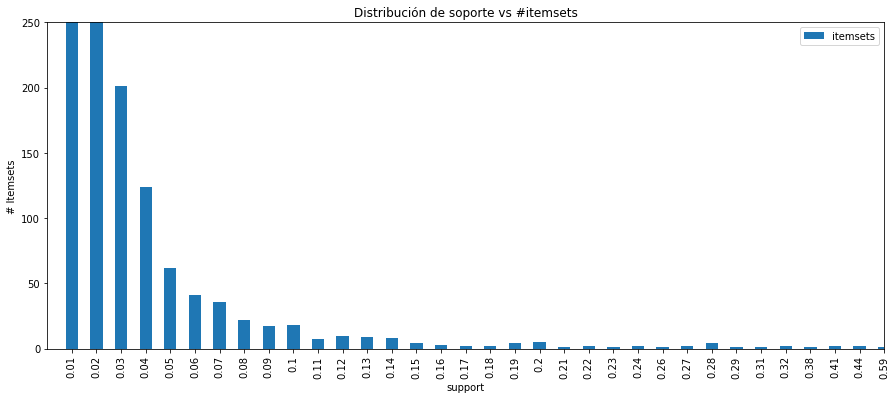

In [373]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

fig = plt.figure(figsize=(15,6))
ax = plt.gca()

df_plot=frequent_itemsets[['itemsets','support']]
df_plot['support']=df_plot['support'].round(2)
df_plot=df_plot[['itemsets','support']].groupby('support',as_index=False).agg({'itemsets':'count'})

start=df_plot['support'].min()
end=df_plot['support'].max()
labels=np.arange(start, end, step=0.01)

plt.title('Distribución de soporte vs #itemsets')
ax.set_ylabel('# Itemsets')
ax.set_xlabel('Support')

df_plot.plot.bar(x='support', y='itemsets', ax=ax)
#ax.set_xticklabels(labels,rotation=30)
ax.set_xlim(-1,33)
ax.set_ylim(0,250)

plt.show()

In [374]:
itemsets_count= frequent_itemsets.itemsets.nunique()

print('Paso a tener un total de {} itemsets'.format(itemsets_count))

Paso a tener un total de 1906 itemsets


### Generación de reglas (confidence)

In [397]:
#Qué threashold utilizo?

rules=association_rules(frequent_itemsets, metric="confidence", min_threshold=0.005)

In [398]:
rules['antecedents_list']=rules['antecedents'].apply(lambda x: [a for a in x])

rules['consequents_list']=rules['consequents'].apply(lambda x: [a for a in x])

In [399]:
#rules_count=rules.apply(lambda x:[[i for i in x.antecedents_list],[g for g in x.consequents_list]], axis=1)

#Número de reglas 

len(rules)

15458

### Análisis de reglas (lift)

In [433]:
rules.sort_values('lift',ascending=False).head(30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_list,consequents_list,caso1_a,caso1_c
14427,(marca_nescafe),"(cafe, var_tot_cat_af)",0.011960,0.015482,0.010444,0.873232,56.404743,0.010259,7.766321,[marca_nescafe],"[cafe, var_tot_cat_af]",True,False
14426,"(cafe, var_tot_cat_af)",(marca_nescafe),0.015482,0.011960,0.010444,0.674600,56.404743,0.010259,3.036387,"[cafe, var_tot_cat_af]",[marca_nescafe],False,False
14241,"(vino, prm_cat_mub)","(tinto, CARREFOUR)",0.018254,0.013023,0.010504,0.575447,44.186622,0.010267,2.324742,"[vino, prm_cat_mub]","[tinto, CARREFOUR]",False,False
14236,"(tinto, CARREFOUR)","(vino, prm_cat_mub)",0.013023,0.018254,0.010504,0.806586,44.186622,0.010267,5.075885,"[tinto, CARREFOUR]","[vino, prm_cat_mub]",False,False
15176,"(marca_aquarius, agua)",(saborizada),0.010160,0.023787,0.010160,1.000000,42.039614,0.009918,inf,"[marca_aquarius, agua]",[saborizada],False,False
15172,(saborizada),(marca_aquarius),0.023787,0.010160,0.010160,0.427120,42.039614,0.009918,1.727832,[saborizada],[marca_aquarius],False,False
15173,(marca_aquarius),(saborizada),0.010160,0.023787,0.010160,1.000000,42.039614,0.009918,inf,[marca_aquarius],[saborizada],True,False
15175,"(saborizada, agua)",(marca_aquarius),0.023787,0.010160,0.010160,0.427120,42.039614,0.009918,1.727832,"[saborizada, agua]",[marca_aquarius],False,False
15177,(saborizada),"(marca_aquarius, agua)",0.023787,0.010160,0.010160,0.427120,42.039614,0.009918,1.727832,[saborizada],"[marca_aquarius, agua]",False,False
15178,(marca_aquarius),"(saborizada, agua)",0.010160,0.023787,0.010160,1.000000,42.039614,0.009918,inf,[marca_aquarius],"[saborizada, agua]",True,False


In [404]:
# Que el vino provenga de la cadena carrefour, implica que sea más económico?

antencendentes=['vino','CARREFOUR']

c=['muc', 'mec', 'lec', 'm', 'leb', 'meb', 'mub']

consecuentes=['prm_cat_'+i for i in c]

rules['caso1_a']=rules['antecedents_list'].apply(lambda x: 
                                                                True 
                                                                if all(a in x for a in antencendentes)
                                                                else False)

rules['caso1_c']=rules['consequents_list'].apply(lambda x: 
                                                                True 
                                                                if any(a in x for a in consecuentes)
                                                                else False)

rules[(rules['caso1_a']==True)&(rules['caso1_c']==True)].sort_values('lift',ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_list,consequents_list,caso1_a,caso1_c
14239,"(CARREFOUR, vino)","(tinto, prm_cat_mub)",0.019281,0.013337,0.010504,0.544799,40.848119,0.010247,2.167535,"[CARREFOUR, vino]","[tinto, prm_cat_mub]",True,True
14232,"(tinto, vino, CARREFOUR)",(prm_cat_mub),0.013023,0.047912,0.010504,0.806586,16.834590,0.009880,4.922544,"[tinto, vino, CARREFOUR]",[prm_cat_mub],True,True
13978,"(CARREFOUR, vino)","(prm_cat_mub, av)",0.019281,0.035324,0.010613,0.550439,15.582457,0.009932,2.145815,"[CARREFOUR, vino]","[prm_cat_mub, av]",True,True
14326,"(Supermercado, CARREFOUR, vino)",(prm_cat_mub),0.014092,0.047912,0.010498,0.744964,15.548438,0.009823,3.733143,"[Supermercado, CARREFOUR, vino]",[prm_cat_mub],True,True
13974,"(CARREFOUR, vino, av)",(prm_cat_mub),0.014310,0.047912,0.010613,0.741663,15.479553,0.009927,3.685450,"[CARREFOUR, vino, av]",[prm_cat_mub],True,True
8820,"(CARREFOUR, vino)",(prm_cat_mub),0.019281,0.047912,0.014298,0.741541,15.477011,0.013374,3.683713,"[CARREFOUR, vino]",[prm_cat_mub],True,True
14333,"(CARREFOUR, vino)","(Supermercado, prm_cat_mub)",0.019281,0.035608,0.010498,0.544486,15.291057,0.009812,2.117152,"[CARREFOUR, vino]","[Supermercado, prm_cat_mub]",True,True


In [409]:
# La zona1 es más cara?

antencendentes=['zona3']

c=['muc', 'mec', 'lec', 'm', 'leb', 'meb', 'mub']

consecuentes=['prm_cat_'+i for i in c]

rules['caso1_a']=rules['antecedents_list'].apply(lambda x: 
                                                                True 
                                                                if len(x)==1
                                                                and all(a in x for a in antencendentes)
                                                                else False)

rules['caso1_c']=rules['consequents_list'].apply(lambda x: 
                                                                True 
                                                                if len(x)==1 
                                                                and any(a in x for a in consecuentes)
                                                                else False)

rules[(rules['caso1_a']==True)&(rules['caso1_c']==True)].sort_values('lift',ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_list,consequents_list,caso1_a,caso1_c
653,(zona3),(prm_cat_m),0.409738,0.138790,0.063853,0.155839,1.122836,0.006985,1.020196,[zona3],[prm_cat_m],True,True
81,(zona3),(prm_cat_leb),0.409738,0.313654,0.142523,0.347840,1.108992,0.014007,1.052419,[zona3],[prm_cat_leb],True,True
1765,(zona3),(prm_cat_meb),0.409738,0.085212,0.037746,0.092123,1.081108,0.002832,1.007613,[zona3],[prm_cat_meb],True,True
5357,(zona3),(prm_cat_mub),0.409738,0.047912,0.019746,0.048192,1.005832,0.000114,1.000294,[zona3],[prm_cat_mub],True,True
169,(zona3),(prm_cat_lec),0.409738,0.277351,0.106800,0.260655,0.939802,-0.006841,0.977418,[zona3],[prm_cat_lec],True,True
3041,(zona3),(prm_cat_mec),0.409738,0.093747,0.028233,0.068905,0.735005,-0.010179,0.973319,[zona3],[prm_cat_mec],True,True
13705,(zona3),(prm_cat_muc),0.409738,0.043334,0.010836,0.026447,0.610316,-0.006919,0.982655,[zona3],[prm_cat_muc],True,True


In [411]:
# Es más barato en avenida?

antencendentes=['no_av']

c=['muc', 'mec', 'lec', 'm', 'leb', 'meb', 'mub']

consecuentes=['prm_cat_'+i for i in c]

rules['caso1_a']=rules['antecedents_list'].apply(lambda x: 
                                                                True 
                                                                if len(x)==1
                                                                and all(a in x for a in antencendentes)
                                                                else False)

rules['caso1_c']=rules['consequents_list'].apply(lambda x: 
                                                                True 
                                                                if len(x)==1 
                                                                and any(a in x for a in consecuentes)
                                                                else False)

rules[(rules['caso1_a']==True)&(rules['caso1_c']==True)].sort_values('lift',ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_list,consequents_list,caso1_a,caso1_c
4152,(no_av),(prm_cat_muc),0.414649,0.043334,0.023545,0.056784,1.310387,0.005577,1.014260,[no_av],[prm_cat_muc],True,True
1049,(no_av),(prm_cat_mec),0.414649,0.093747,0.048613,0.117239,1.250591,0.009741,1.026612,[no_av],[prm_cat_mec],True,True
95,(no_av),(prm_cat_lec),0.414649,0.277351,0.132732,0.320106,1.154155,0.017728,1.062885,[no_av],[prm_cat_lec],True,True
716,(no_av),(prm_cat_m),0.414649,0.138790,0.060845,0.146738,1.057267,0.003296,1.009315,[no_av],[prm_cat_m],True,True
161,(no_av),(prm_cat_leb),0.414649,0.313654,0.110352,0.266133,0.848495,-0.019704,0.935247,[no_av],[prm_cat_leb],True,True
3514,(no_av),(prm_cat_meb),0.414649,0.085212,0.025974,0.062640,0.735111,-0.009359,0.975920,[no_av],[prm_cat_meb],True,True
10661,(no_av),(prm_cat_mub),0.414649,0.047912,0.012588,0.030359,0.633628,-0.007279,0.981897,[no_av],[prm_cat_mub],True,True


In [432]:
# que onda las marcas?

antencendentes=['marca_nescafe']

c=['df', 'dm', 'dl', 'm', 'al', 'am', 'af']

consecuentes=['var_tot_cat_'+i for i in c]

#consecuentes=['cafe']
rules['caso1_a']=rules['antecedents_list'].apply(lambda x: 
                                                                True 
                                                                if len(x)==1
                                                                and any("marca" in s for s in x)
                                                                else False)

rules['caso1_c']=rules['consequents_list'].apply(lambda x: 
                                                                True 
                                                                if len(x)==1
                                                                and any(a in x for a in consecuentes)
                                                                else False)

rules[(rules['caso1_a']==True)&(rules['caso1_c']==True)].sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_list,consequents_list,caso1_a,caso1_c
6836,(marca_la serenisima),(var_tot_cat_am),0.026451,0.236083,0.017112,0.646951,2.740356,0.010868,2.163773,[marca_la serenisima],[var_tot_cat_am],True,True
14430,(marca_nescafe),(var_tot_cat_af),0.011960,0.436431,0.010444,0.873232,2.000849,0.005224,4.445685,[marca_nescafe],[var_tot_cat_af],True,True
6268,(marca_arcor),(var_tot_cat_af),0.025279,0.436431,0.017729,0.701314,1.606931,0.006696,1.886830,[marca_arcor],[var_tot_cat_af],True,True


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_list,consequents_list,vino,COTO,CARREFOUR,SUPER_+_ZONA,VARIACIONES
1564,"(Supermercado, lec, COTO, zona2)",(af),0.023183,0.436431,0.01161,0.500782,1.147448,0.001492,1.128903,"[Supermercado, lec, COTO, zona2]",[af],False,True,False,True,True


In [410]:
df_apriori['SUPER_+_ZONA']

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1938    False
1939    False
1940    False
1941    False
1942    False
1943    False
1944    False
1945    False
1946    False
1947    False
1948    False
1949    False
1950    False
1951    False
1952    False
1953    False
1954    False
1955    False
1956    False
1957    False
1958    False
1959    False
1960    False
1961    False
1962    False
1963    False
1964    False
1965    False
1966    False
1967    False
Name: SUPER_+_ZONA, Length: 1968, dtype: bool